In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel,variation
from statsmodels.stats.power import ttest_power
from scipy.stats import chi2_contingency
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
# Codes for Question 1

df = pd.read_csv('Wholesale+Customers+Data.csv')
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [4]:
# Using describe,info,tail,head,size,shape,columns we get to know about EDA of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [7]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [8]:
df.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125
439,440,Hotel,Other,2787,1698,2510,65,477,52


In [9]:
df.shape
print("The number of rows are -",df.shape[0],"\nThe number of columns are -",df.shape[1])

The number of rows are - 440 
The number of columns are - 9


In [10]:
df.size

3960

In [11]:
df.columns

Index(['Buyer/Spender', 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicatessen'],
      dtype='object')

In [12]:
df1 = df.groupby(df["Region"]).sum()
df1

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,,
Lisbon,18095,854833,422454,570037,231026,204136,104327
Oporto,14899,464721,239144,433274,190132,173311,54506
Other,64026,3960577,1888759,2495251,930492,890410,512110


In [13]:
df1.drop("Buyer/Spender",axis=1,inplace=True)
df1

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327
Oporto,464721,239144,433274,190132,173311,54506
Other,3960577,1888759,2495251,930492,890410,512110


In [14]:
df1.sum(axis=1)
# Oporto spent least and other spent max

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
dtype: int64

In [7]:
df2 = df.groupby(df["Channel"]).sum()
df2

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,,
Hotel,71034,4015717,1028614,1180717,1116979,235587,421955
Retail,25986,1264414,1521743,2317845,234671,1032270,248988


In [8]:
df2.drop("Buyer/Spender",axis=1,inplace=True)

In [9]:
df2

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955
Retail,1264414,1521743,2317845,234671,1032270,248988


In [160]:
df2.sum(axis=1)
# Retail spent least and Hotel spent max

Channel
Hotel     7999569
Retail    6619931
dtype: int64

In [6]:
pvt = pd.pivot_table(df,['Fresh','Milk', 'Grocery','Frozen', 'Detergents_Paper', 'Delicatessen'],index = ["Region","Channel"])
pvt

Delicatessen  Detergents_Paper         Fresh       Frozen  \
Region Channel                                                              
Lisbon Hotel     1197.152542        950.525424  12902.254237  3127.322034   
       Retail    1871.944444       8225.277778   5200.000000  2584.111111   
Oporto Hotel     1105.892857        482.714286  11650.535714  5745.035714   
       Retail    1239.000000       8410.263158   7289.789474  1540.578947   
Other  Hotel     1518.284360        786.682464  13878.052133  3656.900474   
       Retail    1826.209524       6899.238095   9831.504762  1513.200000   

                     Grocery          Milk  
Region Channel                              
Lisbon Hotel     4026.135593   3870.203390  
       Retail   18471.944444  10784.000000  
Oporto Hotel     4395.500000   2304.250000  
       Retail   16326.315789   9190.789474  
Other  Hotel     3886.734597   3486.981043  
       Retail   15953.809524  10981.009524

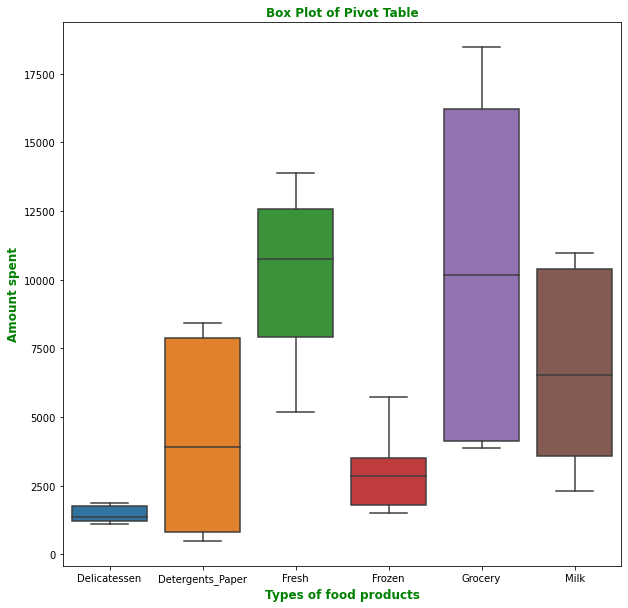

In [64]:
plt.figure(figsize=(10,10))
sns.boxplot(data=pvt)
plt.title("Box Plot of Pivot Table",color= 'g',fontweight="bold",fontsize=12)
plt.xlabel("Types of food products",color= 'g',fontweight="bold",fontsize=12)
plt.ylabel("Amount spent",color= 'g',fontweight="bold",fontsize=12)
plt.savefig("pvt_boxplot.png",bbox_inches="tight")

In [19]:
df_new  = df.copy()

In [20]:
df_new.drop(["Buyer/Spender","Channel","Region"],axis=1,inplace=True)

In [21]:
df_new

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [22]:
# To find cofficient of variance of all food category
cv = lambda x: np.std(x, ddof=1) / np.mean(x)

In [23]:
df_new.apply(cv)

Fresh               1.053918
Milk                1.273299
Grocery             1.195174
Frozen              1.580332
Detergents_Paper    1.654647
Delicatessen        1.849407
dtype: float64

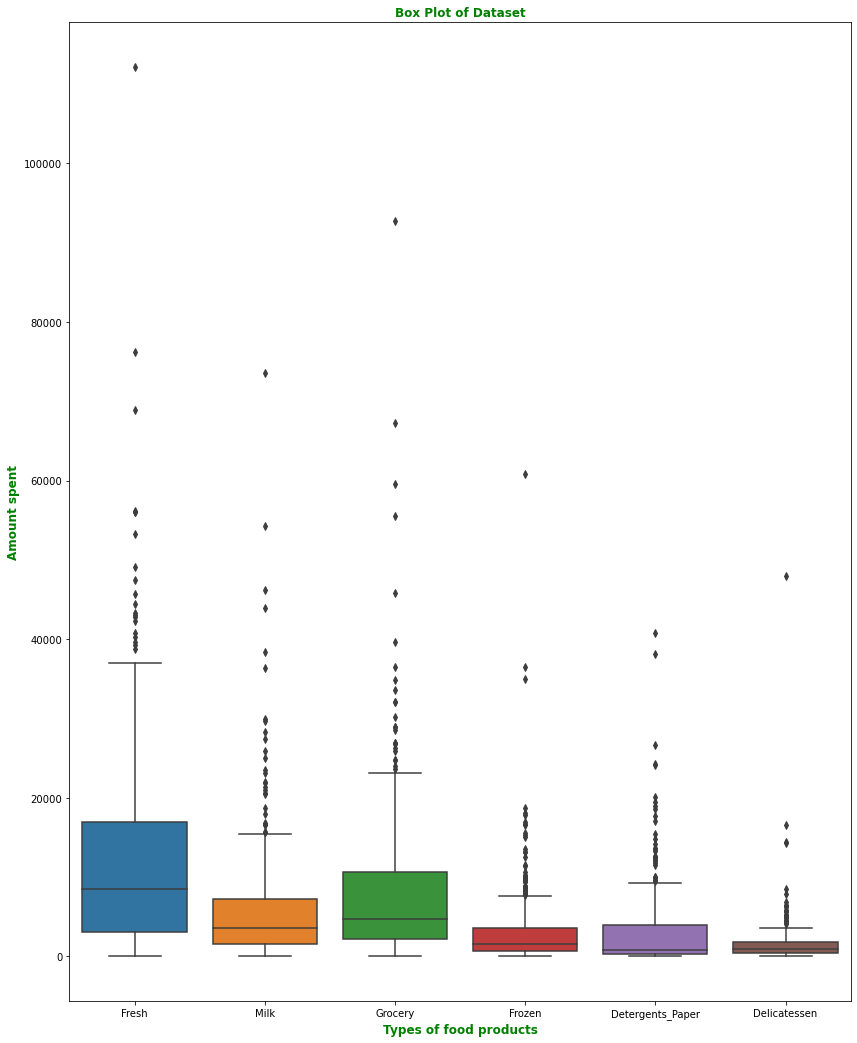

In [16]:
# Making a box plot by dropping Buyer/Spender column.
df3 = df.drop("Buyer/Spender",axis=1)
plt.figure(figsize=(14,18))
sns.boxplot(data=df3)
plt.title("Box Plot of Dataset",color= 'g',fontweight="bold",fontsize=12)
plt.xlabel("Types of food products",color= 'g',fontweight="bold",fontsize=12)
plt.ylabel("Amount spent",color= 'g',fontweight="bold",fontsize=12)
plt.savefig("Outliers_boxplot.png",bbox_inches="tight")

In [25]:
## End of Question 1

In [4]:
# Codes for Question 2
q2_df = pd.read_csv('Survey-1.csv')
q2_df

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [6]:
q2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [7]:
q2_df.columns

Index(['ID', 'Gender', 'Age', 'Class', 'Major', 'Grad Intention', 'GPA',
       'Employment', 'Salary', 'Social Networking', 'Satisfaction', 'Spending',
       'Computer', 'Text Messages'],
      dtype='object')

In [10]:
ct1 = pd.crosstab(q2_df["Gender"],q2_df["Major"],margins=True)
ct1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [53]:
ct2 = pd.crosstab(q2_df["Gender"],q2_df["Grad Intention"])
ct2

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [55]:
ct3 = pd.crosstab(q2_df["Gender"],q2_df["Employment"])
ct3

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [57]:
ct4 = pd.crosstab(q2_df["Gender"],q2_df["Computer"])
ct4

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [14]:
q2_df["Gender"].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [4]:
Prob_male = round(29/(33+29),4)
Prob_male

0.4677

In [5]:
Prob_female = round(33/(33+29),4)
Prob_female

0.5323

In [10]:
pd.crosstab(q2_df["Major"],q2_df["Gender"])

Gender,Female,Male
Major,,
Accounting,3,4
CIS,3,1
Economics/Finance,7,4
International Business,4,2
Management,4,6
Other,3,4
Retailing/Marketing,9,5
Undecided,0,3


In [19]:
q2_df["Major"].value_counts()

Retailing/Marketing       14
Economics/Finance         11
Management                10
Accounting                 7
Other                      7
International Business     6
CIS                        4
Undecided                  3
Name: Major, dtype: int64

In [11]:
# To find Conditional probability of different majors among male students(i.e 29 Males out of 62 students)

##P(Retailing/Marketing|Male)
cpm1 = round(5/29,4)
##P(Economics/Finance|Male)
cpm2 = round(4/29,4)
##P(Management|Male) 
cpm3 = round(6/29,4)
##P(Accounting|Male)  
cpm4 = round(4/29,4)
##P(Other|Male)    
cpm5 = round(4/29,4)
##P(International Business|Male) 
cpm6 = round(2/29,4)
##P(CIS|Male)    
cpm7 = round(1/29,4)
##P(Undecided|Male)     
cpm8 = round(3/29,4)
print("P(Retailing/Marketing|Male)    - ",cpm1)
print("P(Economics/Finance|Male)      - ",cpm2)
print("P(Management|Male)             - ",cpm3)
print("P(Accounting|Male)             - ",cpm4)
print("P(Other|Male)                  - ",cpm5)
print("P(International Business|Male) - ",cpm6)
print("P(CIS|Male)                    - ",cpm7)
print("P(Undecided|Male)              - ",cpm8)

# Conclusion - Management is most preferred subject among male students and 
# CIS is the least preferred subject among male students

P(Retailing/Marketing|Male)    -  0.1724
P(Economics/Finance|Male)      -  0.1379
P(Management|Male)             -  0.2069
P(Accounting|Male)             -  0.1379
P(Other|Male)                  -  0.1379
P(International Business|Male) -  0.069
P(CIS|Male)                    -  0.0345
P(Undecided|Male)              -  0.1034


In [12]:
# To find Conditional probability of different majors among female students(i.e 33 females out of 62 students)

##P(Retailing/Marketing|Female)
cpf1 = round(9/33,4)
##P(Economics/Finance|Female)
cpf2 = round(7/33,4)
##P(Management|Female) 
cpf3 = round(4/33,4)
##P(Accounting|Female)  
cpf4 = round(3/33,4)
##P(Other|Male)    
cpf5 = round(3/33,4)
##P(International Business|Female) 
cpf6 = round(4/33,4)
##P(CIS|Female)    
cpf7 = round(3/33,4)
##P(Undecided|Female)     
cpf8 = round(0/33,4)
print("P(Retailing/Marketing|Female)    - ",cpf1)
print("P(Economics/Finance|Female)      - ",cpf2)
print("P(Management|Female)             - ",cpf3)
print("P(Accounting|Female)             - ",cpf4)
print("P(Other|Female)                  - ",cpf5)
print("P(International Business|Female) - ",cpf6)
print("P(CIS|Female)                    - ",cpf7)
print("P(Undecided|Female)              - ",cpf8)

# Conclusion - Retailing/Marketing is most preferred subject among female students

P(Retailing/Marketing|Female)    -  0.2727
P(Economics/Finance|Female)      -  0.2121
P(Management|Female)             -  0.1212
P(Accounting|Female)             -  0.0909
P(Other|Female)                  -  0.0909
P(International Business|Female) -  0.1212
P(CIS|Female)                    -  0.0909
P(Undecided|Female)              -  0.0


In [19]:
# Probablility of random is male and graduate.

q2_df["Grad Intention"].value_counts()

Yes          28
Undecided    22
No           12
Name: Grad Intention, dtype: int64

In [8]:
Prob_Grduate = round(28/62,4)
Prob_Grduate

0.4516

In [21]:
result1 = Prob_male*Prob_Grduate
result1

0.2115

In [22]:
# Probablility of random chosen student is female and does not have laptop.

q2_df["Computer"].value_counts()

Laptop     55
Desktop     5
Tablet      2
Name: Computer, dtype: int64

In [9]:
Prob_Notlaptop = round(7/62,4)
Prob_Notlaptop

0.1129

In [24]:
result2 = Prob_female*Prob_Notlaptop
result2

0.058300000000000005

In [25]:
# Probablility of randomly chosen student is a male or has full-time employment

q2_df["Employment"].value_counts()

Part-Time     43
Full-Time     10
Unemployed     9
Name: Employment, dtype: int64

In [10]:
Prob_fulltime = round(10/62,4)
Prob_fulltime

0.1613

In [27]:
result3 = Prob_male + Prob_fulltime - (Prob_male*Prob_fulltime)
result3

0.5548

In [41]:
# Conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

q2_df[(q2_df["Gender"] == "Female") & (q2_df["Major"] == "Management")]

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400
19,20,Female,20,Junior,Management,Undecided,3.2,Unemployed,60.0,2,6,300,Laptop,350
45,46,Female,21,Senior,Management,Undecided,3.8,Part-Time,60.0,1,4,650,Laptop,150
50,51,Female,21,Junior,Management,No,3.5,Unemployed,35.0,2,4,600,Tablet,100


In [36]:
q2_df[(q2_df["Gender"] == "Female") & (q2_df["Major"] == "International Business")]

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
27,28,Female,20,Junior,International Business,Yes,2.9,Part-Time,50.0,3,1,900,Laptop,100
44,45,Female,21,Senior,International Business,No,3.0,Part-Time,30.0,2,5,650,Desktop,500
56,57,Female,21,Senior,International Business,Yes,3.4,Part-Time,42.0,1,1,200,Laptop,100
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10


In [32]:
# There are 8 total female doing Management and International Business, so the result is as follows

# Result = Probability of Female doing both subjects / Total Number of Females

result4 = round(8/33,4)
result4

0.2424

In [59]:
ct5 = pd.crosstab(q2_df["Gender"],q2_df["Grad Intention"])
ct5.drop("Undecided",axis=1,inplace=True)
ct5

# Yes being female and graduate intention are both independent events

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [15]:
# 17 students have GPA less than 3

#q2_df[q2_df["GPA"] < 3].groupby(["Gender"]).count()["GPA"].sum()
q2_df.Gender.count()

62

In [33]:
# probability that his/her GPA is less than 3

result5 = round(17/62,4)
result5

0.2742

In [3]:
# 32 students have Salary of 50 or more 

q2_df[q2_df["Salary"] >= 50].shape

(32, 14)

In [13]:
new_df = q2_df[q2_df["Salary"] >= 50]
new_df["Gender"].value_counts()

Female    18
Male      14
Name: Gender, dtype: int64

In [5]:
# Conditional probability that a randomly selected male earns 50 or more

result6 = round(14/29,4)
result6

0.4828

In [6]:
# Conditional probability that a randomly selected female earns 50 or more

result6 = round(18/33,4)
result6

0.5455

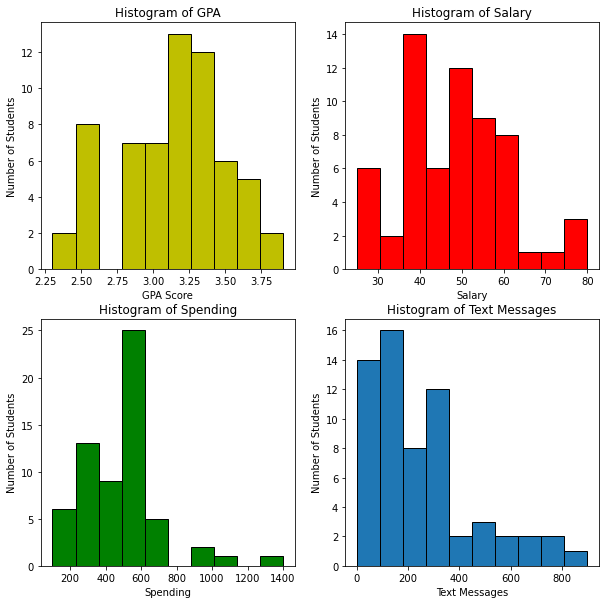

In [42]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.hist(q2_df["GPA"],edgecolor="k",color="y")
plt.xlabel('GPA Score')
plt.ylabel('Number of Students')
plt.title('Histogram of GPA')
plt.subplot(2,2,2)
plt.hist(q2_df["Salary"],edgecolor="k",color="r")
plt.xlabel('Salary')
plt.ylabel('Number of Students')
plt.title('Histogram of Salary')
plt.subplot(2,2,3)
plt.hist(q2_df["Spending"],edgecolor="k",color="g")
plt.xlabel('Spending')
plt.ylabel('Number of Students')
plt.title('Histogram of Spending')
plt.subplot(2,2,4)
plt.hist(q2_df["Text Messages"],edgecolor="k")
plt.xlabel('Text Messages')
plt.ylabel('Number of Students')
plt.title('Histogram of Text Messages')
plt.savefig("Histogram_DistCheck.png",bbox_inches="tight")

# Judging from the graphs plotted for the 4 continuous variable we can tell the graph of GPA Score and Salary
# follow a normal distribution whereas
# graph of spending and text Messages is both right skewed

In [9]:
## End of Question 2

In [10]:
# Code for Question 3

In [14]:
q3_df = pd.read_csv('A+&+B+shingles.csv')
q3_df.head(10)

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


In [16]:
q3_df.tail(10)

,A,B
26,0.49,0.16
27,0.34,0.52
28,0.36,0.36
29,0.29,0.22
30,0.27,0.39
31,0.40,NaN
32,0.29,NaN
33,0.43,NaN
34,0.34,NaN
35,0.37,NaN


In [13]:
q3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [14]:
# There are 5 null values in Column B
q3_df.isnull().sum()

A    0
B    5
dtype: int64

In [17]:
# aplha = 0.05 ,mean = 0.35

# For Column A
t_statistics,p_value = ttest_1samp(q3_df["A"],0.35)

In [18]:
t_statistics,round(p_value/2,4)

# since ttest_1samp give result for a 2 tailed p-value, we need to divide the p-value by 2

(-1.4735046253382782, 0.0748)

In [ ]:
### Conclusion - Since p-value more than alpha we fail the reject H0 or accept H0 hypothesis.
### Therefore no evidence to conclude that mean moisture content for Shingle A is less than 0.35 pounds per 100 square feet.

In [19]:
# aplha = 0.05 ,mean = 0.35

# For Column B
t_statistics,p_value = ttest_1samp(q3_df["B"],0.35,nan_policy='omit')

In [20]:
t_statistics,round(p_value/2,4)

# since ttest_1samp give result for a 2 tailed p-value, we need to divide the p-value by 2

(-3.1003313069986995, 0.0021)

In [46]:
### Conclusion - Since p-value less than alpha we the reject H0 hypothesis.
### Therefore there is enough evidence that we can to conclude that mean moisture content for 
### Shingle B is less than 0.35 pounds per 100 square feet. 

In [21]:
# Assumption - Data of both shingles follow normal distribution and the variance of both data is same

t_statistics,p_value = ttest_ind(q3_df["A"],q3_df["B"],equal_var=True,nan_policy='omit')

In [22]:
t_statistics,round(p_value,4)

(1.2896282719661123, 0.2017)

In [ ]:
### Conclusion - Since p-value is greater than alpha we fail to reject H0 hypothesis.
### Therefore there is enough evidence that we can conclude that population mean of both shingles A and B is equal 